## Preprocessing Data

Tahapan :
1. Labelling Data
2. Case Folding
3. Tokenizing
4. Filtering
5. Stemming
6. Analysis
7. Visualization

In [12]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ai_Gp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
#import data
data_linkedin = pd.read_csv(r'dataset\data scraping linkedin.csv')
data_linkedin.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,46c71918-0504-4dce-899d-1592cc9a88df,Rhea Lolliola,https://play-lh.googleusercontent.com/a-/ALV-U...,Terbaik,5,0,NaN,2024-10-24 21:41:33,NaN,NaN,NaN
1,2723ac5e-2275-4e00-af1e-eb3d6a13e0b6,Hamdani Arta,https://play-lh.googleusercontent.com/a-/ALV-U...,"Pelajaran buat kalian, jangan reset HP jika be...",1,0,4.1.995,2024-10-24 20:31:15,NaN,NaN,4.1.995
2,a1b48885-cb55-4569-894d-1452bc0a3eb6,Vahmi Putri,https://play-lh.googleusercontent.com/a-/ALV-U...,Yang terbaik,5,0,NaN,2024-10-24 06:50:36,NaN,NaN,NaN
3,080166c7-41a8-4656-94df-34af892ef23c,gawink didin,https://play-lh.googleusercontent.com/a/ACg8oc...,Keren,5,0,4.1.958.1,2024-10-24 01:00:01,NaN,NaN,4.1.958.1
4,38ce5f6f-66c1-43f1-a62f-a7c88a2a6218,Mochammad Farid,https://play-lh.googleusercontent.com/a/ACg8oc...,"Very use full to find job in around the world,...",5,0,NaN,2024-10-23 21:39:53,NaN,NaN,NaN


In [37]:
data_linkedin = data_linkedin.drop("userImage", axis=1)
data_linkedin = data_linkedin.drop("thumbsUpCount", axis=1)
data_linkedin = data_linkedin.drop("reviewCreatedVersion", axis=1)
data_linkedin = data_linkedin.drop("replyContent", axis=1)
data_linkedin = data_linkedin.drop("repliedAt", axis=1)
data_linkedin = data_linkedin.drop("appVersion", axis=1)
data_linkedin.head()

,reviewId,userName,content,score,at
0,46c71918-0504-4dce-899d-1592cc9a88df,Rhea Lolliola,Terbaik,5,2024-10-24 21:41:33
1,2723ac5e-2275-4e00-af1e-eb3d6a13e0b6,Hamdani Arta,"Pelajaran buat kalian, jangan reset HP jika be...",1,2024-10-24 20:31:15
2,a1b48885-cb55-4569-894d-1452bc0a3eb6,Vahmi Putri,Yang terbaik,5,2024-10-24 06:50:36
3,080166c7-41a8-4656-94df-34af892ef23c,gawink didin,Keren,5,2024-10-24 01:00:01
4,38ce5f6f-66c1-43f1-a62f-a7c88a2a6218,Mochammad Farid,"Very use full to find job in around the world,...",5,2024-10-23 21:39:53


In [38]:
data_linkedin2 = data_linkedin.copy()

### 1. Labeling Data Based on Reviews

In [39]:
label = []
for index, row in data_linkedin.iterrows():
    if row['score'] == 1 or row['score'] == 2:
        label.append('negatif')
    elif row['score'] == 3:
        label.append('netral')
    else:
        label.append('positif')

data_linkedin2['label'] = label

In [40]:
data_linkedin2.head()

,reviewId,userName,content,score,at,label
0,46c71918-0504-4dce-899d-1592cc9a88df,Rhea Lolliola,Terbaik,5,2024-10-24 21:41:33,positif
1,2723ac5e-2275-4e00-af1e-eb3d6a13e0b6,Hamdani Arta,"Pelajaran buat kalian, jangan reset HP jika be...",1,2024-10-24 20:31:15,negatif
2,a1b48885-cb55-4569-894d-1452bc0a3eb6,Vahmi Putri,Yang terbaik,5,2024-10-24 06:50:36,positif
3,080166c7-41a8-4656-94df-34af892ef23c,gawink didin,Keren,5,2024-10-24 01:00:01,positif
4,38ce5f6f-66c1-43f1-a62f-a7c88a2a6218,Mochammad Farid,"Very use full to find job in around the world,...",5,2024-10-23 21:39:53,positif


### 2. Case Folding

In [41]:
# Converting text to lowercase
data_linkedin2['content'] = data_linkedin2['content'].str.lower()
data_linkedin2

,reviewId,userName,content,score,at,label
0,46c71918-0504-4dce-899d-1592cc9a88df,Rhea Lolliola,terbaik,5,2024-10-24 21:41:33,positif
1,2723ac5e-2275-4e00-af1e-eb3d6a13e0b6,Hamdani Arta,"pelajaran buat kalian, jangan reset hp jika be...",1,2024-10-24 20:31:15,negatif
2,a1b48885-cb55-4569-894d-1452bc0a3eb6,Vahmi Putri,yang terbaik,5,2024-10-24 06:50:36,positif
3,080166c7-41a8-4656-94df-34af892ef23c,gawink didin,keren,5,2024-10-24 01:00:01,positif
4,38ce5f6f-66c1-43f1-a62f-a7c88a2a6218,Mochammad Farid,"very use full to find job in around the world,...",5,2024-10-23 21:39:53,positif
...,...,...,...,...,...,...
995,4ef320cd-795f-49bd-af2c-a7b7a5ab9f6c,Musafak Safak,.t,4,2024-06-22 17:09:20,positif
996,0d27b061-50a3-4a06-a7d5-e7807fbd5ebc,zanuar ruhan,masuk saja harus ke email parah,1,2024-06-22 16:43:59,negatif
997,eb66dd37-2a1b-449c-9a81-fe9166e74402,Guruh Pahiya Akbar,sering error,1,2024-06-22 16:01:16,negatif
998,41627c46-f7e0-463e-ae46-fd703c76edf4,Indra Wahyudi Triatmojo,mantap 👍🏻,5,2024-06-22 15:10:33,positif


In [43]:
import re
# remove numbers in data
remove_num = data_linkedin2['content'].apply(lambda x: re.sub(r"\d", "", x))
remove_num.head()

0                                              terbaik
1    pelajaran buat kalian, jangan reset hp jika be...
2                                         yang terbaik
3                                                keren
4    very use full to find job in around the world,...
Name: content, dtype: object

In [44]:
import string
# remove punctuation in content

remove_punc = remove_num.str.translate(str.maketrans("", "", string.punctuation))
remove_punc.head()

0                                              terbaik
1    pelajaran buat kalian jangan reset hp jika bel...
2                                         yang terbaik
3                                                keren
4    very use full to find job in around the world ...
Name: content, dtype: object

In [45]:
# remove whitespace 
remove_ws = remove_punc.str.strip()
remove_ws.head()

0                                              terbaik
1    pelajaran buat kalian jangan reset hp jika bel...
2                                         yang terbaik
3                                                keren
4    very use full to find job in around the world ...
Name: content, dtype: object

### 3. Tokenizing

In [46]:
# Break down each word
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_linkedin2['tokenized'] = remove_ws.apply(word_tokenize_wrapper)
print("tokenizing result: ")
print(data_linkedin2['tokenized'].head())

tokenizing result: 
0                                            [terbaik]
1    [pelajaran, buat, kalian, jangan, reset, hp, j...
2                                      [yang, terbaik]
3                                              [keren]
4    [very, use, full, to, find, job, in, around, t...
Name: tokenized, dtype: object


### 4. Filtering

In [47]:
# Stopword Removal
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ai_Gp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# Get stopword
list_stopwords = stopwords.words()

# Additional stopword
list_stopwords.extend(['yg', 'dgn', 'dr', 'di', 'dari', 'ke', 'gw', 'gue', 'jadi', 'nya', 'apk', 'sih', 'yang',
                       'dan', 'atau', 'juga', 'utk', 'untuk', 'aja', 'karena', 'tetapi', 'ini', 'gua', 'saya',
                       'ya', 'yah', 'aku', 'nih', 'tuh', 'klo', 'kalo', 'kalau', 'go', 'you', 'i', 'udh', 'sudah', 'sdh',
                       'udah', 'gak', 'ga', 'gk', 'tidak', 'tdk', 'nan', 'aplikasi', 'linkedin', 'linkedIn'])
list_stopwords = set(list_stopwords)

# Remove stopword in the list tokenizing
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_linkedin2['without_stopwords'] = data_linkedin2['tokenized'].apply(stopwords_removal)
print(data_linkedin2['without_stopwords'].head())

0                                          [terbaik]
1    [pelajaran, reset, hp, logout, susah, loginnya]
2                                          [terbaik]
3                                            [keren]
4                           [full, find, job, world]
Name: without_stopwords, dtype: object


### 5. Stemming

In [49]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    var = []
    for x in content:
        st = stemmer.stem(x)
        var.append(st)
    data_clean = []
    data_clean = " ".join(var)
    print(data_clean)
    return data_clean

stemming_result = data_linkedin2['without_stopwords'].apply(stemming)
stemming_result.head()

stemming_result.to_csv('data bersih.csv', index=False)
data_clean = pd.read_csv('data bersih.csv', encoding='latin1')
data_clean.head()

baik
ajar reset hp logout susah loginnya
baik
keren
full find job world
langgar akun batas verivikasi tolong guna dipermudahaplikadi bagus mohon guna mudah
kode qr kembali
info loker bos
bantu
bagus
oke
koin
baik
tarik untung program initetapi menginstal hp
easy share
error tanggal oktober
hack account enter account report make active email report persona verification uploaad id indonesia loose robe data
mandi terima buruk hancur tau orang bukti orang kirim saldo terima kasih mahju pantang mundur
mantap

coba moga sukses tambah bintang
mantap
verifikasi gambar error login credential sesuai
informatif strike points

amazing
alam mudah cari kerja
bagus
job work
aplication job
terimakasih bantu
cari kerja
manfaat bener buk informasi lowong kerja pokok
hidup bermaknathaks likedin

susah login kode verifikasi kirim
ribet bgt pake banyak iklan

wmmmoc
bang hadir tubuh manusia orang
tambah layan baik

bantu
bantu cari loker terimakasih
bagus
iya bagus
tolong kembali duit bayar item linkedln t

,without_stopwords
0,baik
1,ajar reset hp logout susah loginnya
2,baik
3,keren
4,full find job world


## 6. Analysis

#### 6a. Combined content and label reviews columns

In [125]:
data_1 = stemming_result
data_2 = data_linkedin2
data_3 = data_2['label']

result = pd.concat([data_1, data_3], axis=1)

In [126]:
result.head()

,without_stopwords,label
0,baik,positif
1,ajar reset hp logout susah loginnya,negatif
2,baik,positif
3,keren,positif
4,full find job world,positif


#### 6b. Calculate the frequency of occurrence of each word in data text

In [127]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

frek =' '.join(stemming_result)

cleaned_text = frek.translate(str.maketrans('', '', string.punctuation)).lower()

# Tokenize the text
words = word_tokenize(cleaned_text)

# Create a frequency distribution
freq_dist = FreqDist(words)

# Print the 10 most common words
print(freq_dist.most_common(10))

[('verifikasi', 86), ('bagus', 81), ('kerja', 71), ('akun', 68), ('bantu', 65), ('login', 60), ('mantap', 39), ('masuk', 39), ('cari', 37), ('susah', 31)]


#### 6c. Sentiment result based on comment using textblob

In [165]:
from textblob import TextBlob
all_polarity = 0;
status=[]
total_positif = total_negatif = total_netral = total = 0

for words in stemming_result:
    analysis=TextBlob(words)
    all_polarity += analysis.polarity
    if (analysis.sentiment.polarity > 0.0):
        total_positif += 1
        status.append("Positif")
    elif(analysis.sentiment.polarity < 0.0):
        total_negatif += 1
        status.append("Negatif")
    else:
        total_netral += 1
        status.append("Netral")
    total += 1

print(f"The result sentiment analysis data: \nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}")
print(f"Total Data: {total}")

The result sentiment analysis data: 
Positif = 50
Negatif = 19
Netral = 931
Total Data: 1000


#### 6d. Sentiment results based on reviews

C:\Users\Ai_Gp\AppData\Local\Temp\ipykernel_14416\3654543540.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentiment = pd.value_counts(data_linkedin2['label'], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

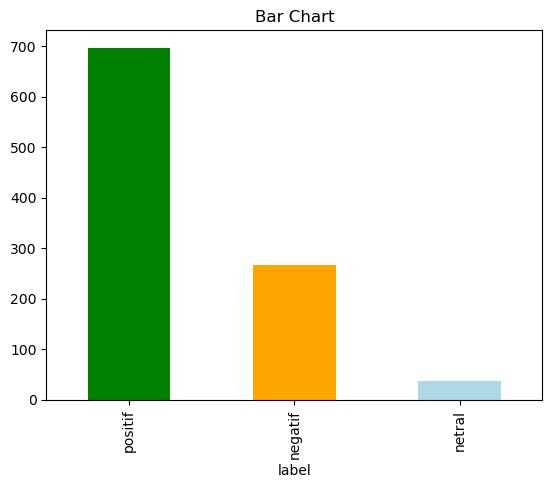

In [174]:
import matplotlib.pyplot as plt
sentiment = pd.value_counts(data_linkedin2['label'], sort=True)
sentiment.plot(kind='bar', color=['green', 'orange', 'lightblue'])
plt.title("Bar Chart")
plt.show

## 7. Visualization

#### 7a. Wordcloud Negatif

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [167]:
sent_neg = result[result['label'] == 'negatif']
sent_neg.head()

,without_stopwords,label
1,ajar reset hp logout susah loginnya,negatif
5,langgar akun batas verivikasi tolong guna dipe...,negatif
15,error tanggal oktober,negatif
16,hack account enter account report make active ...,negatif
22,verifikasi gambar error login credential sesuai,negatif


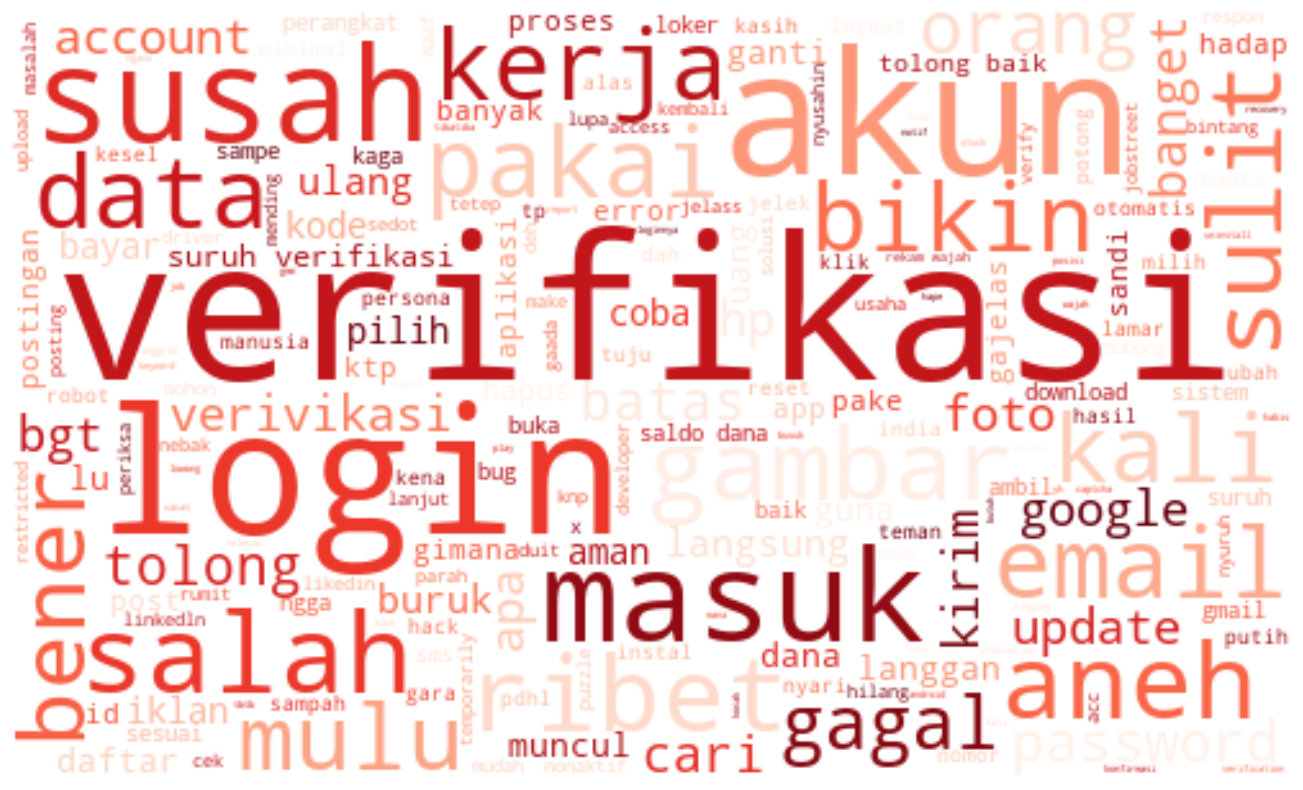

In [169]:
all_text_negatif = ' '.join(str(word) for word in sent_neg['without_stopwords'])
# Create a WordCloud object
wordcloud = WordCloud(colormap='Reds', width=500, height=300, mode='RGBA', background_color='white')

# Generate the word cloud
wordcloud.generate(all_text_negatif)

# Display the generated image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 7b. Wordcloud positif

In [170]:
sent_pos = result[result['label'] == 'positif']
sent_pos.head()

,without_stopwords,label
0,baik,positif
2,baik,positif
3,keren,positif
4,full find job world,positif
6,kode qr kembali,positif


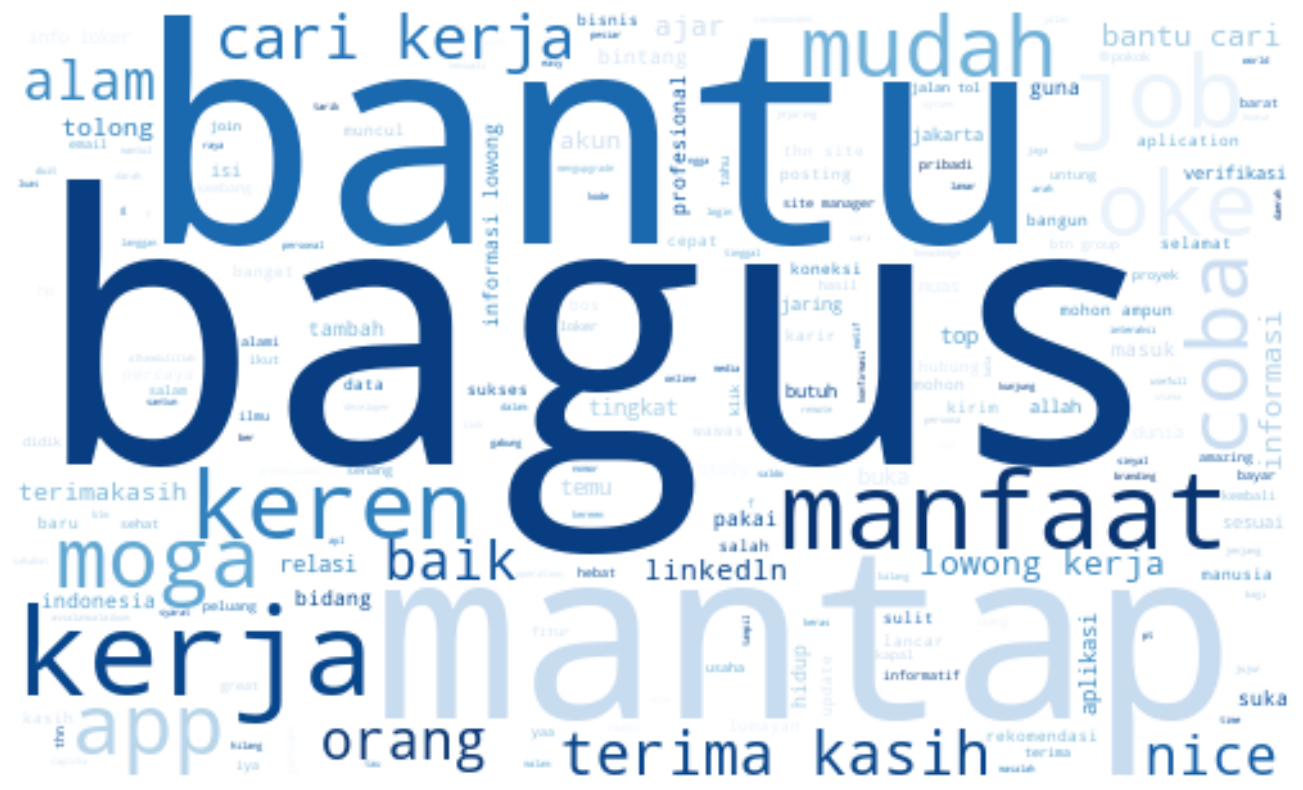

In [171]:
all_text_positif = ' '.join(str(word) for word in sent_pos['without_stopwords'])
# Create a WordCloud object
wordcloud = WordCloud(colormap='Blues', width=500, height=300, mode='RGBA', background_color='white')

# Generate the word cloud
wordcloud.generate(all_text_positif)

# Display the generated image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()